HEIGHT: 375; WIDTH: 1242


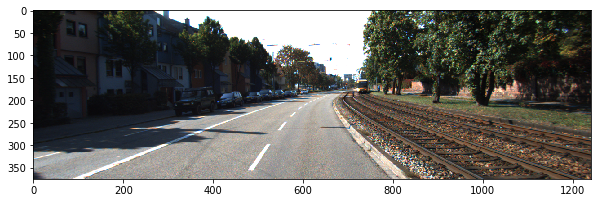

In [3]:
from __future__ import print_function
import os
import cv2
from matplotlib import pyplot as plt

from local_config import CURRENT_DIR

TEST_IMAGE_FILE = "0000000000.png"
TEST_XML_FILE = os.path.join(CURRENT_DIR, "tracklet_labels.xml")

test_img = cv2.imread(TEST_IMAGE_FILE)
assert(test_img is not None)

HEIGHT, WIDTH = test_img.shape[:2]
print("HEIGHT: {}; WIDTH: {}".format(HEIGHT, WIDTH))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [4]:
import xml.etree.ElementTree as ET
xml_tree = ET.parse(TEST_XML_FILE)

xml_root = xml_tree.getroot()

tracklet_items = xml_root[0].findall("item")

num_tracklets = len(tracklet_items)

print("NUM TRACKLET: {}".format(num_tracklets))

NUM TRACKLET: 15


In [5]:
test_tracklet = tracklet_items[0]

tracklet_label = test_tracklet.find("objectType").text
first_frame = test_tracklet.find("first_frame").text
tracklet_poses = test_tracklet.find("poses")
len_tracklet = int(tracklet_poses.find("count").text)

print("LABEL: {}".format(tracklet_label))
print("FIRST FRAME: {}".format(first_frame))
print("LEN TRACKLET: {}".format(len_tracklet))

LABEL: Car
FIRST FRAME: 0
LEN TRACKLET: 14


# Third party code

In [6]:
import sys
sys.path.append(os.path.join(CURRENT_DIR, ".."))
from utility import parseXML

parsing tracklet file /home/buggy/publicWorkspace/dev/obstacle_detection_stixelnet/notebooks/tracklet_labels.xml
file contains 15 tracklets
loaded 15 tracklets


In [21]:
import pykitti

DATA_PATH = os.path.abspath(os.path.join(CURRENT_DIR, "../data"))

basedir = DATA_PATH
date = '2011_09_26'
drive = '0001'

data = pykitti.raw(basedir, date, drive)

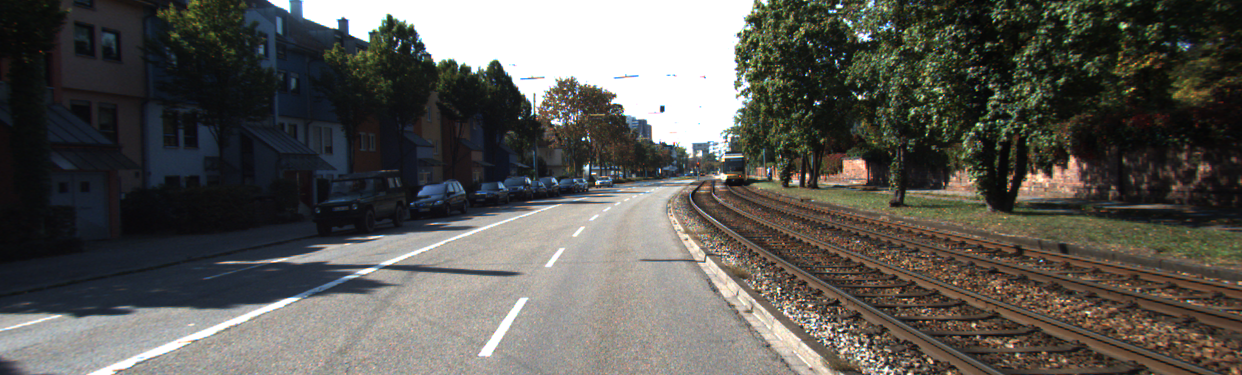

In [22]:
data.get_rgb(0)[0]

In [18]:
# data.calib

In [24]:
data.data_path

'/home/buggy/publicWorkspace/dev/obstacle_detection_stixelnet/data/2011_09_26/2011_09_26_drive_0001_sync'

In [25]:
os.listdir("/home/buggy/publicWorkspace/dev/obstacle_detection_stixelnet/data/2011_09_26/2011_09_26_drive_0001_sync")

['tracklet_labels.xml',
 'oxts',
 'velodyne_points',
 'image_02',
 'image_01',
 'image_03',
 'image_00']

In [26]:
tracklets = parseXML(os.path.join(data.data_path, "tracklet_labels.xml"))

parsing tracklet file /home/buggy/publicWorkspace/dev/obstacle_detection_stixelnet/data/2011_09_26/2011_09_26_drive_0001_sync/tracklet_labels.xml
file contains 15 tracklets
loaded 15 tracklets
